### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Loading Dataset

In [2]:
data=[]
Id=[]
for i in range(1,5):
    d=pd.read_csv("data_new_"+str(i)+".csv")
    Id.append(d["OrderId"])
    d=d.drop(["OrderId"],axis=1)
    data.append(d)

In [3]:
data[0]

,OrderQuantity,ExpectedDays,ActualDays,Status
0,936,9,9,1
1,638,7,7,1
2,213,4,4,1
3,422,5,5,1
4,992,7,7,1
...,...,...,...,...
4995,626,9,9,1
4996,605,9,9,1
4997,875,10,14,0
4998,204,3,3,1


In [4]:
data[0].Status.value_counts()

1    4137
0     863
Name: Status, dtype: int64

In [5]:
data[1]

,OrderQuantity,ExpectedDays,ActualDays,Status
0,936,6,6,1
1,638,9,9,1
2,213,3,3,1
3,422,4,4,1
4,992,6,6,1
...,...,...,...,...
4995,626,7,7,1
4996,605,9,9,1
4997,875,8,8,1
4998,204,3,7,0


### Splitting Dataset into Train and Test

In [6]:
from sklearn.model_selection import train_test_split
X_train=[None]*4
X_test=[None]*4
y_train=[None]*4
y_test=[None]*4
for i in range(4):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(data[i].iloc[:,0:3],data[i].iloc[:,3], test_size=0.20)

### Implementing Logistic Classifier

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import mean_squared_error
predictionList=[]
errList=[]
for j in range(4):
    lr = LR(random_state=0,solver='lbfgs').fit(X_train[j], y_train[j])
    lr.fit(X_train[j], y_train[j])
    predict=lr.predict(X_test[j])
    err=mean_squared_error(y_test[j],predict)
    errList.append(err)
    predictionList.append(predict)

### Confusion Matrix For Each Supplier

#### For Supplier1

In [9]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test[0], predictionList[0])
cm1

array([[171,   0],
       [  0, 829]])

In [10]:
import seaborn as sn
sn.heatmap(cm1, annot=True)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test[0],predictionList[0]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       829

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [12]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[0],predictionList[0])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [17]:
prob=lr.predict_proba(X_test[0])

In [18]:
prob

array([[3.70841969e-03, 9.96291580e-01],
       [4.70039669e-03, 9.95299603e-01],
       [9.99999981e-01, 1.91514412e-08],
       ...,
       [4.30571446e-03, 9.95694286e-01],
       [1.00000000e+00, 5.73459096e-15],
       [1.00000000e+00, 6.39743223e-15]])

In [19]:
prob1_1 = pd.DataFrame(data=prob[:,0])
prob1_2 = pd.DataFrame(data=prob[:,1])
prob1_2.head()

,0
0,9.962916e-01
1,9.952996e-01
2,1.915144e-08
3,9.945053e-01
4,9.947241e-01


#### For Supplier2

In [20]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test[1], predictionList[1])
cm1

array([[177,   0],
       [  0, 823]])

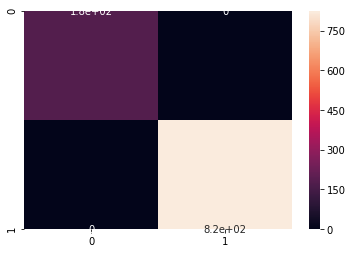

In [21]:
import seaborn as sn
sn.heatmap(cm1, annot=True)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test[1],predictionList[1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       823

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [23]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[1],predictionList[1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [25]:
prob=lr.predict_proba(X_test[1])
prob

array([[9.99932315e-01, 6.76851671e-05],
       [3.90604732e-03, 9.96093953e-01],
       [3.50575885e-03, 9.96494241e-01],
       ...,
       [4.17783983e-03, 9.95822160e-01],
       [4.48693700e-03, 9.95513063e-01],
       [1.00000000e+00, 6.94288234e-15]])

In [26]:
prob2_1 = pd.DataFrame(data=prob[:,0])
prob2_2 = pd.DataFrame(data=prob[:,1])
prob2_2.head()

,0
0,0.000068
1,0.996094
2,0.996494
3,0.996448
4,0.995486


#### For Supplier3

In [27]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test[2], predictionList[2])
cm1

array([[164,   0],
       [  0, 836]])

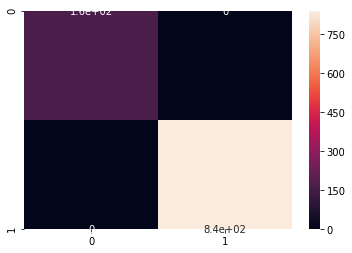

In [28]:
import seaborn as sn
sn.heatmap(cm1, annot=True)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test[2],predictionList[2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       836

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [30]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[2],predictionList[2])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [32]:
prob=lr.predict_proba(X_test[2])
prob

array([[3.79867007e-03, 9.96201330e-01],
       [5.82402899e-03, 9.94175971e-01],
       [3.79919454e-03, 9.96200805e-01],
       ...,
       [3.90162710e-03, 9.96098373e-01],
       [9.09760353e-01, 9.02396473e-02],
       [9.99927772e-01, 7.22283161e-05]])

In [33]:
prob3_1 = pd.DataFrame(data=prob[:,0])
prob3_2 = pd.DataFrame(data=prob[:,1])
prob3_2.head()

,0
0,0.996201
1,0.994176
2,0.996201
3,0.995964
4,0.993934


#### For Supplier4

In [34]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test[3], predictionList[3])
cm1

array([[181,   0],
       [  0, 819]])

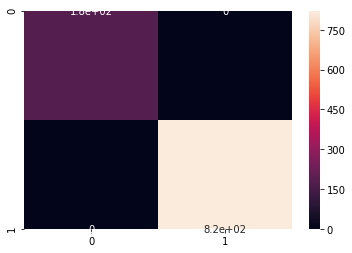

In [35]:
import seaborn as sn
sn.heatmap(cm1, annot=True)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test[3],predictionList[3]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       819

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [37]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[3],predictionList[3])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [39]:
prob=lr.predict_proba(X_test[2])
prob

array([[3.79867007e-03, 9.96201330e-01],
       [5.82402899e-03, 9.94175971e-01],
       [3.79919454e-03, 9.96200805e-01],
       ...,
       [3.90162710e-03, 9.96098373e-01],
       [9.09760353e-01, 9.02396473e-02],
       [9.99927772e-01, 7.22283161e-05]])

In [40]:
prob4_1 = pd.DataFrame(data=prob[:,0])
prob4_2 = pd.DataFrame(data=prob[:,1])
prob4_2.head()

,0
0,0.996201
1,0.994176
2,0.996201
3,0.995964
4,0.993934


In [41]:
df_col_merged =pd.concat([prob1_2,prob2_2], axis=1)

In [42]:
df_col_merged

,0,0
0,9.962916e-01,6.768517e-05
1,9.952996e-01,9.960940e-01
2,1.915144e-08,9.964942e-01
3,9.945053e-01,9.964480e-01
4,9.947241e-01,9.954856e-01
...,...,...
995,9.958770e-01,9.955953e-01
996,5.495702e-05,1.086436e-01
997,9.956943e-01,9.958222e-01
998,5.734591e-15,9.955131e-01
